Keys in the file: ['#refs#', 'actualVariable']
Original Data Shape: (16240, 144)
First Column Shape: (16240,)
Downsampled Column Shape: (82,)


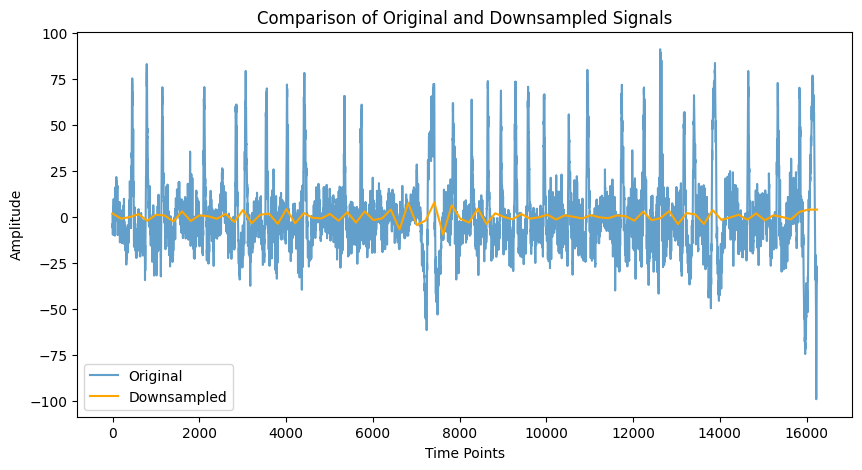

In [ ]:
import h5py
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

file_name = 'S01_B_RWEO_PreOL.mat'
with h5py.File(file_name, 'r') as f:
    # Inspect the keys to find the structure
    print("Keys in the file:", list(f.keys()))
    
    # Navigate to the specific dataset
    # Adjust the path based on the file structure
    data = np.array(f['actualVariable/EEG_full/data'])  # Replace with correct path
    print("Original Data Shape:", data.shape)

# Extract the first column of the data field
first_column = data[:, 0]  # Extract first column
print("First Column Shape:", first_column.shape)

# Downsample the first column
downsampled_column = scipy.signal.decimate(first_column, q=200)  # Adjust 'q' for downsampling factor
print("Downsampled Column Shape:", downsampled_column.shape)

# Visualization
plt.figure(figsize=(10, 5))

# Original column
plt.plot(first_column, label="Original", alpha=0.7)
plt.title("Comparison of Original and Downsampled Signals")
plt.xlabel("Time Points")
plt.ylabel("Amplitude")

# Downsampled column
downsampled_points = np.linspace(0, len(first_column), len(downsampled_column))
plt.plot(downsampled_points, downsampled_column, label="Downsampled", color="orange")

plt.legend()
plt.show()
